In [1]:
import snapatac2 as snap

In [ ]:
fragment_file = "../../../MISAR-seq/E15_s1/fragments.tsv.bgz"

In [3]:
snap.__version__

'2.4.0'

In [4]:
data = snap.pp.import_data(
    fragment_file=fragment_file,
    genome=snap.genome.mm10,
    file="temp.h5ad",
    sorted_by_barcode=False,
    min_num_fragments=0,
    min_tsse=0
)
data

AnnData object with n_obs x n_vars = 1949 x 0 backed at 'temp.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'insertion'

In [7]:
snap.pp.add_tile_matrix(data)

In [8]:
snap.pp.select_features(data)
snap.tl.spectral(data)

2025-12-01 20:39:05 - INFO - Selected 500000 features.


In [9]:
snap.pp.knn(data)
snap.tl.leiden(data)

In [10]:
snap.tl.call_peaks(data, groupby="leiden", q_value=0.01)
peaks = list(data.uns["peaks"]["Peaks"])

2025-12-01 20:39:37 - INFO - Exporting data...
2025-12-01 20:43:05 - INFO - Calling peaks for 10 groups ...
2025-12-01 20:44:56 - INFO - Merging peaks...


In [11]:
import anndata as ad
import numpy as np
peak_mat = snap.pp.make_peak_matrix(data, use_rep=peaks, out_file=ad.AnnData(X=np.zeros((data.shape[0], len(peaks)))))

In [ ]:
import scanpy as sc
rna = sc.read_h5ad("../../../datatset/MultiEmbryo2/rna_annot.h5ad")

In [18]:
peak_mat = peak_mat[rna.obs_names]
peak_mat.obs["annot"] = rna.obs["annot"].copy()

/tmp/ipykernel_1139582/577279848.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  peak_mat.obs["annot"] = rna.obs["annot"].copy()


In [ ]:
peak_mat.write("../../../datatset/MultiEmbryo2/atac.h5ad")

In [5]:
snap.pp.make_gene_matrix(data, snap.genome.mm10, inplace=True)

In [6]:
data

AnnData object with n_obs x n_vars = 1949 x 55291 backed at 'temp.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'insertion'

In [ ]:
data.write("/../../../datatset/MultiEmbryo2/gs.h5ad")

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd

In [4]:
spatial = rna.obsm["spatial"].astype(int)

spatial = spatial @ np.array([[1, 0], [0, -1]])
spatial = spatial @ np.array([[-1, 0], [0, 1]])
theta = np.deg2rad(270)
spatial = spatial @ np.array([
                [np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]
            ])
spatial[:, 1] = spatial[:, 1] + 51
spatial =spatial.astype(int)

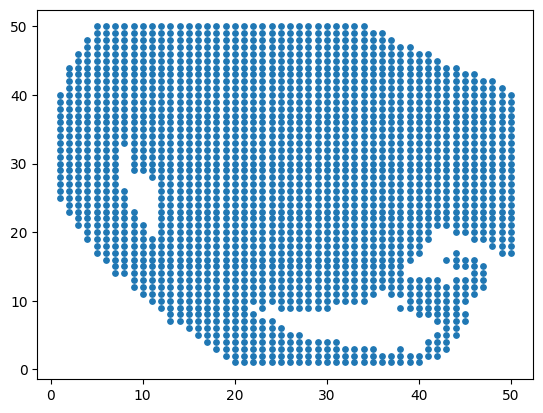

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=spatial[:,0], y=spatial[:,1], s=15)

In [6]:
df_coords = pd.DataFrame(spatial, dtype=int)
df_coords.index = list(rna.obs_names)
df_coords.columns = ["x", "y"]

In [7]:
df_coords_sorted = df_coords.sort_values(by=["y", "x"], ascending=False)

In [192]:
# for i in range(1, 51):
#     print(f"{51-i}: {df_coords_sorted.loc[df_coords_sorted['y']==i].shape[0]}")

In [184]:
labels = ["Muscle"] *3 + ["Cartilage"] * 27 + \
    ["Muscle"] * 5 + ["Cartilage"] * 27 + \
    ["Muscle"] * 6 + ["Cartilage"] * 28 + \
    ["Muscle"] * 8 + ["Cartilage"] * 28 + \
    ["Muscle"] * 8 + ["Cartilage"] * 31 + \
    ["Muscle"] * 9 + ["Cartilage"] * 31 + \
    ["Muscle"] * 8 + ["Cartilage"] * 21 + ["Mesenchyme"] * 7 + ["Cartilage"] * 7 + \
    ["Muscle"] * 9 + ["Cartilage"] * 20 + ["Mesenchyme"] * 11 + ["Cartilage"] * 5 + \
    ["Muscle"] * 9 + ["Cartilage"] * 19 + ["Mesenchyme"] * 6 + ["Forebrain"] * 8 + ["Mesenchyme"] * 1 + ["Cartilage"] * 4 + \
    ["Muscle"] * 8 + ["Cartilage"] * 19 + ["Mesenchyme"] * 5 + ["Forebrain"] * 12 + ["Mesenchyme"] * 1 + ["Cartilage"] * 3 + \
    ["Cartilage"] * 3 + ["Muscle"] * 4 + ["Cartilage"] * 16 + ["Mesenchyme"] * 9 + ["Forebrain"] * 15 + ["Cartilage"] * 3 + \
    ["Cartilage"] * 21 + ["Mesenchyme"] * 3 + ["Forebrain"] * 6 + ["Mesenchyme"] * 1 + ["Forebrain"] * 17 + ["Cartilage"] * 2 + \
    ["Cartilage"] * 17 + ["Mesenchyme"] * 5 + ["Forebrain"] * 26 + ["Cartilage"] * 2 + \
    ["Cartilage"] * 15 + ["Mesenchyme"] * 4 + ["Forebrain"] * 30 + ["Cartilage"] * 1 + \
    ["Cartilage"] * 13 + ["Mesenchyme"] * 5 + ["Forebrain"] * 31 + ["Skull"] * 1 + \
    ["Cartilage"] * 12 + ["Mesenchyme"] * 5 + ["Forebrain"] * 32 + ["Skull"] * 1 + \
    ["Cartilage"] * 11 + ["Mesenchyme"] * 5 + ["Forebrain"] * 33 + ["Skull"] * 1 + \
    ["Cartilage"] * 10 + ["Mesenchyme"] * 6 + ["Forebrain"] * 33 + ["Skull"] * 1 + \
    ["Cartilage"] * 7 + ["Mesenchyme"] * 9 + ["Forebrain"] * 32 + ["Skull"] * 1 + \
    ["Cartilage"] * 5 + ["Mesenchyme"] * 11 + ["Forebrain"] * 32 + ["Skull"] * 1 + \
    ["Cartilage"] * 3 + ["Mesenchyme"] * 13 + ["Forebrain"] * 32 + ["Skull"] * 1 + \
    ["Cartilage"] * 1 + ["Mesenchyme"] * 4 + ["Hindbrain"] *7 + ["Mesenchyme"] * 4 + ["Forebrain"] * 32 + ["Skull"] * 1 + \
    ["Mesenchyme"] * 3 + ["Hindbrain"] * 10 + ["Mesenchyme"] * 3 + ["Forebrain"] * 29 + ["Skull"] * 2 + \
    ["Mesenchyme"] * 2 + ["Hindbrain"] * 12 + ["Mesenchyme"] * 2 + ["Forebrain"] * 28 + ["Skull"] * 2 + \
    ["Mesenchyme"] * 1 + ["Hindbrain"] * 14 + ["Mesenchyme"] * 1 + ["Forebrain"] * 29 + ["Skull"] * 2 + \
    ["Hindbrain"] * 15 + ["Mesenchyme"] * 2 + ["Forebrain"] * 28 + ["Skull"] * 2 + \
    ["Hindbrain"] * 16 + ["Mesenchyme"] * 2 + ["Forebrain"] * 27 + ["Skull"] * 1 + \
    ["Hindbrain"] * 17 + ["Mesenchyme"] * 2 + ["Forebrain"] * 26 + ["Skull"] * 2 + \
    ["Hindbrain"] * 18 + ["Mesenchyme"] * 2 + ["Forebrain"] * 25 + ["Skull"] * 1 + \
    ["Hindbrain"] * 19 + ["Mesenchyme"] * 2 + ["Forebrain"] * 24 + ["Skull"] * 2 + \
    ["Hindbrain"] * 17 + ["Mesenchyme"] * 3 + ["Forebrain"] * 23 + ["Skull"] * 1 + \
    ["Hindbrain"] * 15 + ["Mesenchyme"] * 3 + ["Midbrain"] * 3 + ["Forebrain"] * 20 + ["Skull"] * 2 + \
    ["Hindbrain"] * 9 + ["Midbrain"] * 3 + ["Mesenchyme"] * 3 + ["Midbrain"] * 8 + ["Forebrain"] * 14 + ["Skull"] * 2 + \
    ["Hindbrain"] * 2 + ["Midbrain"] * 11 + ["Mesenchyme"] * 1 + ["Midbrain"] * 14 + ["Mesenchyme"] *1 +  ["Forebrain"] * 7 + ["Skull"] * 3 + \
    ["Midbrain"] * 28 + ["Mesenchyme"] * 2 + ["Forebrain"] * 6 + ["Skull"] * 2 + \
    ["Midbrain"] * 27 + ["Mesenchyme"] * 3 + ["Forebrain"] * 2 + ["Mesenchyme"] * 2 + ["Skull"] * 2 + \
    ["Midbrain"] * 25 + ["Mesenchyme"] * 6 + ["Skull"] * 3 + \
    ["Midbrain"] * 31 + ["Mesenchyme"] * 6 + ["Skull"] * 1 + \
    ["Midbrain"] * 32 + ["Mesenchyme"] * 5 + ["Skull"] * 2 + \
    ["Midbrain"] * 30 + ["Mesenchyme"] * 4 + ["Skull"] * 2 + \
    ["Midbrain"] * 26 + ["Mesenchyme"] * 3 + ["Skull"] * 2 + \
    ["Midbrain"] * 20 + ["Mesenchyme"] * 2 + ["Skull"] * 2 + \
    ["Midbrain"] * 13 + ["Mesenchyme"] * 1 + ["Skull"] * 2 + \
    ["Midbrain"] * 13 + ["Skull"] * 3 + \
    ["Midbrain"] * 11 + ["Skull"] * 2 + \
    ["Midbrain"] * 13 + ["Skull"] * 2 + \
    ["Midbrain"] * 16 + ["Skull"] * 2 + \
    ["Midbrain"] * 20 + ["Skull"] * 2 + \
    ["Midbrain"] * 22 + ["Skull"] * 2 + \
    ["Midbrain"] * 19 + ["Skull"] * 2 
     

In [185]:
all_labels = []
for i in range(df_coords_sorted.shape[0]):
    if(i<len(labels)):
        all_labels.append(labels[i])
    else:
        all_labels.append("Unknwon")

In [186]:
df_coords_sorted["label"] = all_labels

In [ ]:
rna = sc.read_h5ad("../../../datatset/MultiEmbryo2/rna.h5ad")
rna.obs["annot"] = df_coords_sorted.reindex(rna.obs_names)["label"]

In [194]:
spatial = rna.obsm["spatial"].astype(int)

spatial = spatial @ np.array([[1, 0], [0, -1]])
# spatial = spatial @ np.array([[-1, 0], [0, 1]])
theta = np.deg2rad(270)
spatial = spatial @ np.array([
                [np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]
            ])
rna.obsm["spatial"] =  spatial

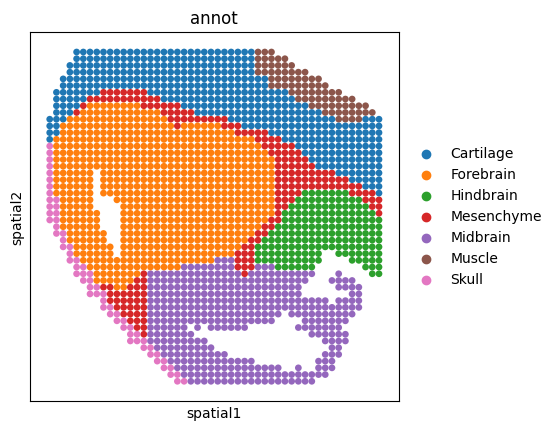

In [195]:
sc.pl.spatial(rna, spot_size=1, color="annot")

In [ ]:
rna.write("/../../../datatset/MultiEmbryo2/rna_annot.h5ad")